In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [81]:
train_df=pd.read_csv('/content/train.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df=pd.read_csv('/content/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
sub_df = pd.read_csv('/content/gender_submission.csv')
sub_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
merged_df = pd.merge(test_df, sub_df, on='PassengerId', how='left')

In [7]:
merged_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [32]:
combined_df = pd.concat([train_df, merged_df])

In [33]:
combined_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
combined_df.shape

(1309, 12)

In [35]:
print(train_df.shape,test_df.shape)

(891, 12) (418, 11)


In [36]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [37]:
combined_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [40]:
combined_df['Age'].fillna(value=combined_df['Age'].mean(),inplace=True)

In [41]:
combined_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,12.883193,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,29.881138,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [42]:
df=combined_df

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [44]:
df=df.drop_duplicates()

In [45]:
df.shape

(1309, 12)

## we will explore he relation between features to each other and the target variable

<Axes: ylabel='Sex'>

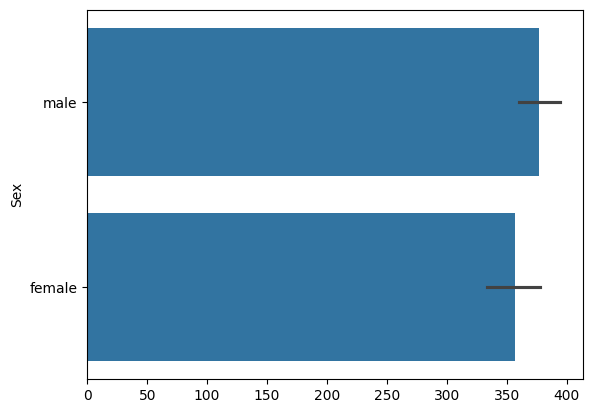

In [47]:
# we will start to explore the relation between the sex and survived
sns.barplot(df['Sex'])

In [53]:
df_sex_surv=df.groupby(['Sex', 'Survived']).size().unstack()

<Axes: xlabel='Sex'>

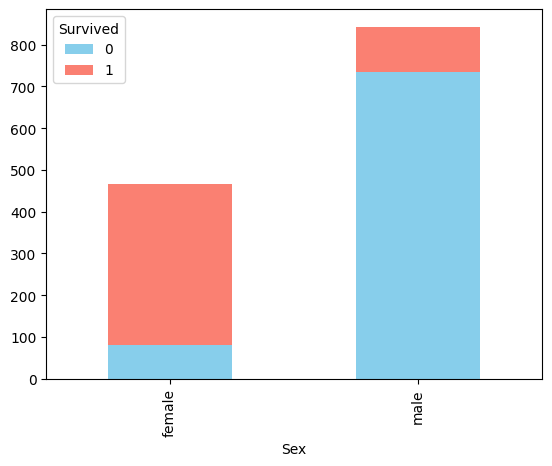

In [54]:
df_sex_surv.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])

In [59]:
df_sex_surv.head()

Survived,0,1
Sex,,
female,81,385
male,734,109


In [62]:
81+385


466

# the sample tells us that most of the males didn't survive but females did

In [64]:
from statsmodels.stats.proportion import proportions_ztest

# Calculate the counts and total counts of survivors for males and females
survived_male = df[df['Sex'] == 'male']['Survived'].sum()
total_male = len(df[df['Sex'] == 'male'])
survived_female = df[df['Sex'] == 'female']['Survived'].sum()
total_female = len(df[df['Sex'] == 'female'])

# Perform a two-sample z-test to compare the survival rates of males and females
ztest, pval = proportions_ztest([survived_male, survived_female], [total_male, total_female])

# Print the results
print("z-test statistic:", ztest)
print("p-value:", pval)

z-test statistic: -24.905334404307723
p-value: 6.513244629920008e-137


the p-value is lower than 0.05 then we reject the null hypothesis and we conclude that there is a significant difference in survival proportions between males and females which means the Sex feature affects the Survival

In [65]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's do the same for the Pclass and Survived to see if the survival effected by the class

In [68]:
pclass_surv_df=df.groupby(['Pclass', 'Survived']).size().unstack()

In [69]:
pclass_surv_df.head()

Survived,0,1
Pclass,,
1,137,186
2,160,117
3,518,191


<Axes: xlabel='Pclass'>

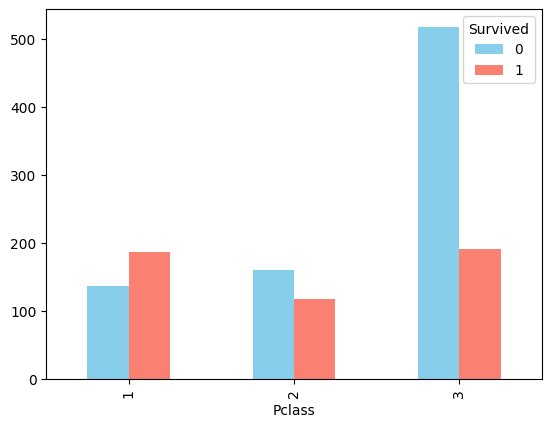

In [70]:
pclass_surv_df.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'])

From the visualization we conclude that the larger propotion of class 1 survived but class 2 and 3 the larger did't survive
we will check if there is a significant difference between classes

In [72]:
from scipy.stats import chi2_contingency

chi2_stat, p_val, dof, expected = chi2_contingency(pclass_surv_df)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 91.72367559290262
p-value: 1.2090852275863937e-20
Degrees of freedom: 2
Expected frequencies table:
[[201.1038961  121.8961039 ]
 [172.46371276 104.53628724]
 [441.43239114 267.56760886]]


Then there is a significant association between passenger class and survival status

In [73]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Now i will check the relation between the age and survival status

<Axes: xlabel='Age', ylabel='Count'>

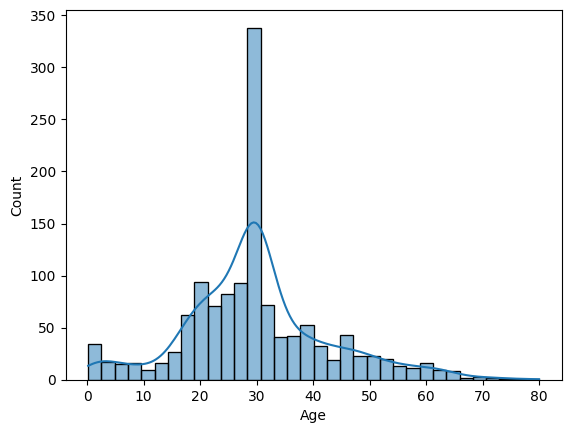

In [74]:
sns.histplot(df['Age'], kde=True)

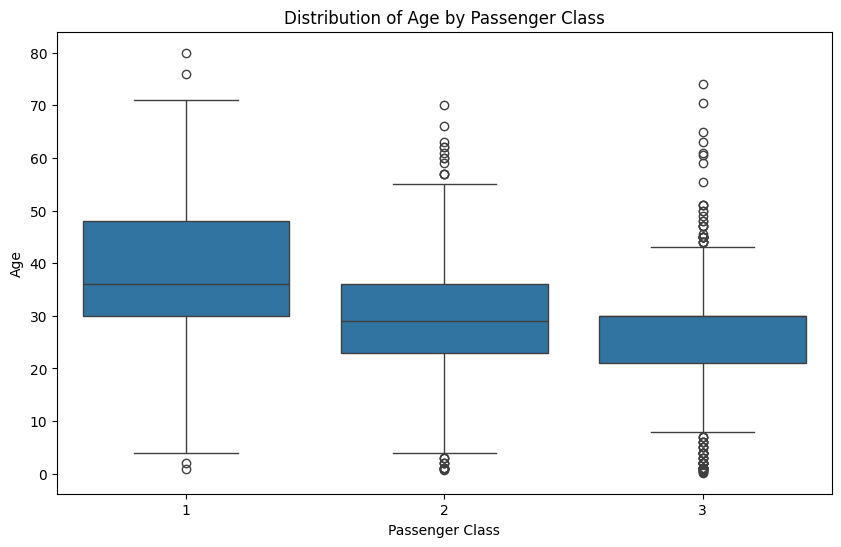

In [75]:
# Create a box plot to visualize the distribution of age within each passenger class
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Distribution of Age by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

The distribution of ages across different passenger classes shows that the pclass 1 has high average age

In [76]:
from scipy.stats import f_oneway

# Extract age data for each passenger class
age_class1 = df[df['Pclass'] == 1]['Age'].dropna()
age_class2 = df[df['Pclass'] == 2]['Age'].dropna()
age_class3 = df[df['Pclass'] == 3]['Age'].dropna()

# Perform one-way ANOVA
f_stat, p_val = f_oneway(age_class1, age_class2, age_class3)

# Print the results
print("ANOVA F-statistic:", f_stat)
print("p-value:", p_val)

ANOVA F-statistic: 107.20251848174398
p-value: 7.788822908627966e-44


then we reject the null hypothesis and conclude that there is a significant difference in the mean age across at least one pair of passenger classes.

# Lets study the relation between the age and Survived status

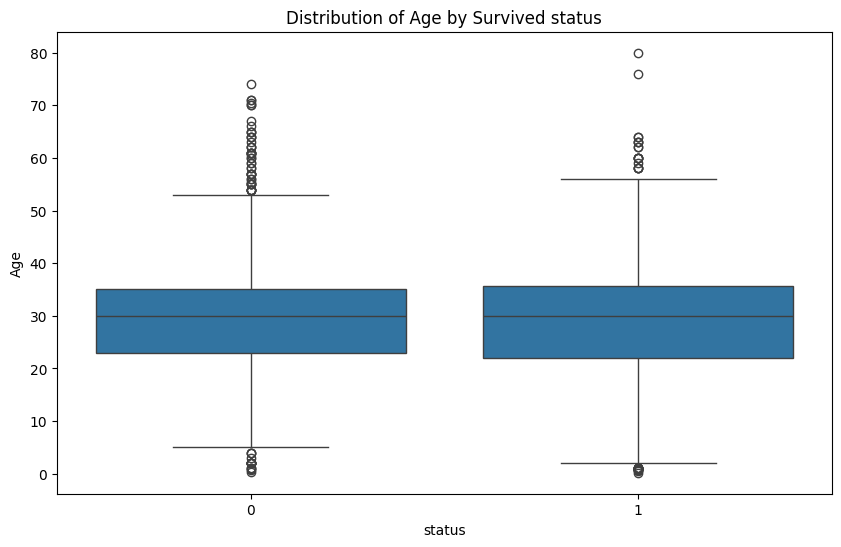

In [77]:
# Create a box plot to visualize the distribution of age and survived status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Distribution of Age by Survived status')
plt.xlabel('status')
plt.ylabel('Age')
plt.show()

In [78]:
# Calculate the mean age for survived and unservived
age_survived = df[df['Survived'] == 1]['Age'].mean()
age_not_survived = df[df['Survived'] == 0]['Age'].mean()

# Print the results
print("Mean age for survived passengers:", age_survived)
print("Mean age for not survived passengers:", age_not_survived)

Mean age for survived passengers: 29.07916518296034
Mean age for not survived passengers: 30.367241234501286


The mean is almost the same which means that the age deosn't affect the survival status
we will do the hypothesis test to check if this is valid

In [79]:

age_not_survived = df[df['Survived'] == 0]['Age'].dropna()
age_survived = df[df['Survived'] == 1]['Age'].dropna()

# Perform one-way ANOVA
f_stat, p_val = f_oneway(age_not_survived, age_survived)

# Print the results
print("ANOVA F-statistic:", f_stat)
print("p-value:", p_val)

ANOVA F-statistic: 3.0794330393477107
p-value: 0.0795224535002286


 since the p-value is greater than 0.05 then there is no significant difference in the mean age between survivors and non-survivors.
  - i will do the two sample t test to check if the same conclusion is valid

In [82]:
from scipy.stats import ttest_ind

# Extract age data for survivors and non-survivors
age_survived = df[df['Survived'] == 1]['Age'].dropna()
age_not_survived = df[df['Survived'] == 0]['Age'].dropna()

# Perform two-sample t-test
t_stat, p_val = ttest_ind(age_survived, age_not_survived)

# Print the results
print("Two-sample t-test statistic:", t_stat)
print("p-value:", p_val)

Two-sample t-test statistic: -1.7548313421373924
p-value: 0.07952245350023047


the same conclusion

#lets explore the relation between fare and age

In [83]:
# Fill NaN values in the 'Fare' column with the average fare
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

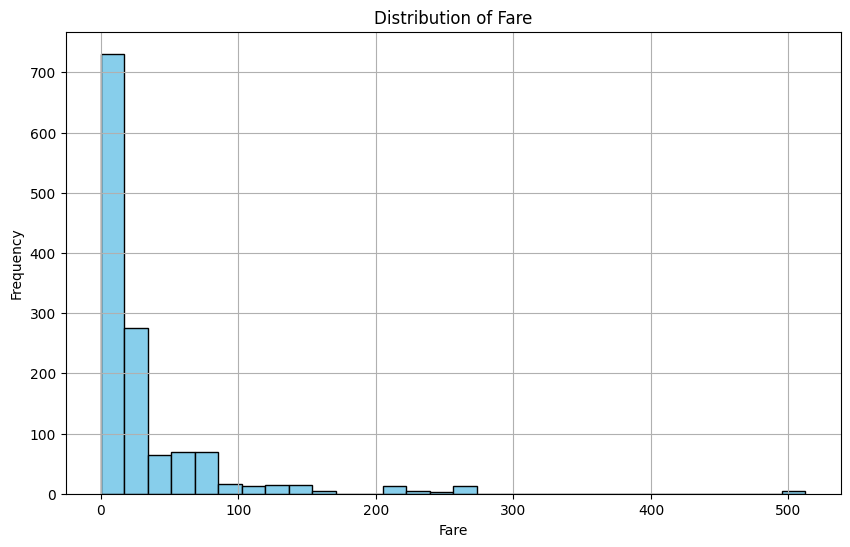

In [85]:
import matplotlib.pyplot as plt

# Plot histogram of 'Fare'
plt.figure(figsize=(10, 6))
plt.hist(df['Fare'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Fare')
plt.grid(True)
plt.show()

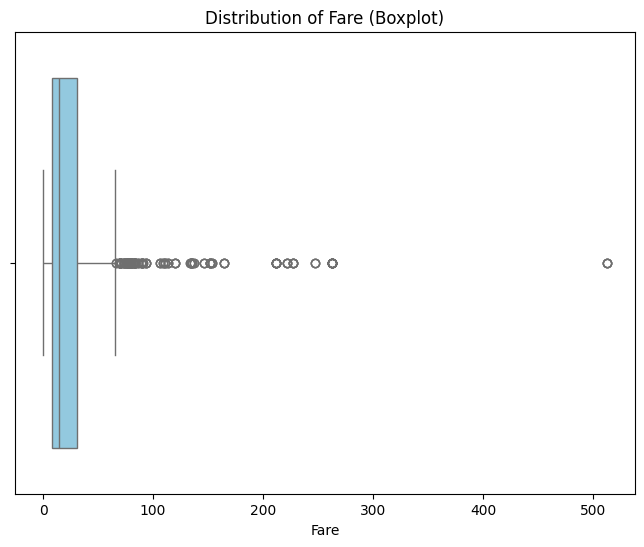

In [86]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fare', data=df, orient='h', color='skyblue')
plt.xlabel('Fare')
plt.title('Distribution of Fare (Boxplot)')
plt.show()

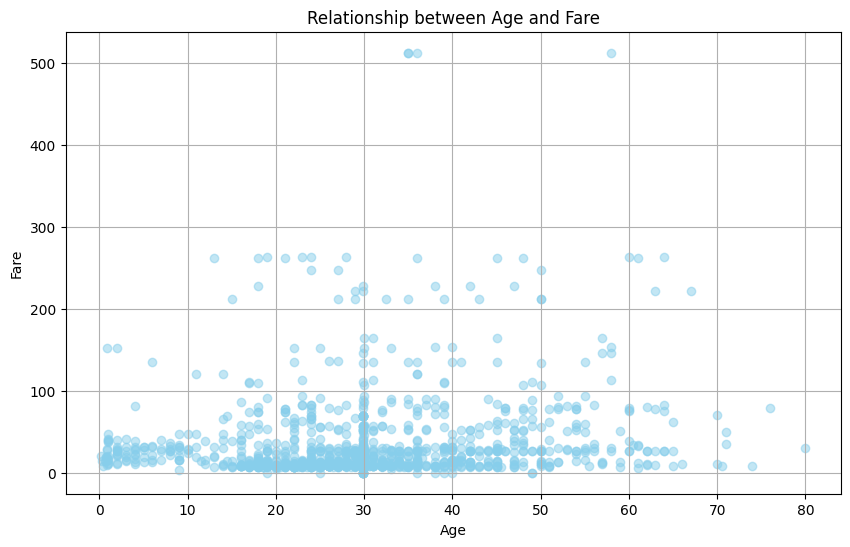

In [88]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Fare'], color='skyblue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Relationship between Age and Fare')
plt.grid(True)
plt.show()

In [89]:
# Calculate the correlation coefficient between 'Fare' and 'Age'
correlation = df['Fare'].corr(df['Age'])

# Print the correlation coefficient
print("Correlation coefficient between Fare and Age:", correlation)


Correlation coefficient between Fare and Age: 0.17152107678734108


#Random forest classifier

In [90]:
X=df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked','Survived'],axis=1)

In [91]:
y=df['Survived']

In [93]:
X.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [94]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [95]:
numeric_features = ['Age', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [96]:
categorical_features = ['Pclass', 'Sex']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [97]:
categorical_features = ['Pclass', 'Sex']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [98]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [99]:
from sklearn.model_selection import train_test_split

X_preprocessed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=1111)

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [105]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=1111)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=1111)

In [106]:
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8396946564885496
